# AlBi 3
### Übungsblatt 12
*Markus Apel, Mathias Husted*

### Aufgabe 3: Principal component analysis

Wir möchten die Expressionsdaten mehrerer Samples zweier Leukämieklassen (Golub et
al., 1991) analysieren. Berechnen Sie dafür die Hauptkomponenten der Leukämiedaten.


a) Es gibt zwei Klassen von Leukämiesamples in diesem Datensatz: AML und ALL.
Beschreiben Sie kurz worum es sich bei diesen Leukämieklassen handelt.

**ALL:**
- Entartung der Vorläuferzellen der Lymphozyten
- Tritt hauptsächlich im Kindesalter (<5 Jahren) auf
- Heilungschancen $\approx 80\%$

**AML:**
- Entartung der Vorläuferzellen von Granulozyten, Monozyten, Erythrozyten und Megakaryozyten
- Häufigste Leukämieform bei Erwachsenen (mittl. Alter ca. 70 Jahre)
- Heilungschancen $\approx 40-50\%$

*Quelle: Google.com KI Übersicht*

b) Lesen Sie die Daten in R ein (z.B. mit read.table). Wie viele Gene und Samples gibt
es? Wie viele Samples sind in der jeweiligen Leukämieklasse?

In [11]:
df <- read.table("golub_train.txt", header=TRUE, sep="\t")
head(df)

,ALL_1,ALL_2,ALL_3,ALL_4,ALL_5,ALL_6,ALL_7,ALL_8,ALL_9,ALL_10,⋯,AML_35,AML_36,AML_37,AML_38,AML_28,AML_29,AML_30,AML_31,AML_32,AML_33
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16550.2368,9724.4211,16318.526,15883.5000,18021.6053,31090.8947,26464.6579,23716.0526,14127.1316,21671.74,⋯,31090.8947,23978.7105,17395.526,18181.1316,17785.2895,24292.3947,9897.0526,23716.0526,18021.61,19571.737
2,713.1842,434.8158,1181.421,377.6842,502.4605,480.0132,354.3553,499.1184,581.3684,732.50,⋯,436.5263,643.3158,1287.842,698.5263,598.6316,343.7105,424.3421,323.1711,467.00,3526.513
3,16448.5263,19356.1842,31090.895,15076.1316,13544.9737,22534.6316,13175.1316,9816.2895,20608.6316,27854.45,⋯,13661.2895,26464.6579,25751.526,20608.6316,19920.3947,14561.7105,26464.6579,20271.5263,15657.37,24292.395
4,19730.5789,17911.8421,23215.763,18021.6053,17120.9737,25080.4211,20446.8421,12025.5263,18181.1316,23474.37,⋯,17395.5263,24292.3947,20608.632,20446.8421,17637.0000,18915.5526,18757.0000,20446.8421,15166.71,18757.000
5,17785.2895,17533.9474,23037.763,15978.5526,15978.5526,25751.5263,14748.7105,16550.2368,18021.6053,19356.18,⋯,12742.6579,22534.6316,16550.237,13784.0789,15380.6842,9191.6842,16448.5263,23978.7105,19730.58,18021.605
6,17120.9737,16318.5263,18021.605,14226.0263,18181.1316,22182.6842,18488.6842,17120.9737,14968.3158,18757.00,⋯,19730.5789,18332.5263,13427.895,13310.9211,14014.9211,10649.8421,15978.5526,18757.0000,16655.32,14468.632


In [ ]:
num_genes <- nrow(df)
print(num_genes)

[1] 2568

[1] 2568


Es gibt innerhalb von ALL die Samples 1..27, und innerhalb AML die Samples 28..38.

$\rightarrow$ Jeweils 27 und 11

c) Log-transformieren Sie die Expressionsdaten und zentrieren Sie diese dann indem Sie
die Mittelwerte jeder Zeile subtrahieren. Erstellen Sie einen Boxplot der Daten. Sind
die Daten schon normalisiert? Begründen Sie Ihre Antwort.

[1] 14.123903  9.234782 13.873681 14.139731 13.750353 13.995167

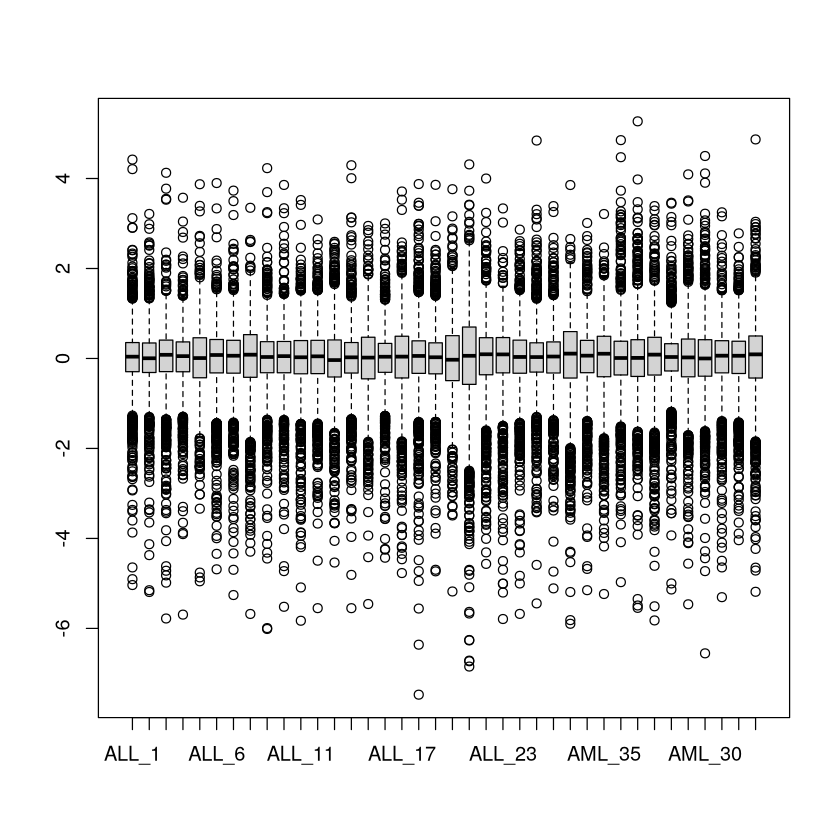

In [19]:
df_log <- log2(df + 1)

means_row <- rowMeans(df_log)

expr_cent <- df_log - means_row

head(means_row)
boxplot(expr_cent)

**Nein**, Daten sind nicht vollständig normalisiert, weil die Varianz erhalten bleibt.

d) Berechnen Sie die Hauptkomponenten der transponierten Expressionsmatrix. Es gibt
zum Beispiel in R Funktionen weil cov, t, eigen, Matrixmultiplikation (wie zB. %*%
in R), svd...



In [52]:
X_t <- t(expr_cent)
cov_x <- cov(X_t)
eigen_x <- eigen(cov_x)
eigenvalues_x <- eigen_x$values
eigenvectors_x <- eigen_x$vectors

PC_scores <- X_t %*% eigenvectors_x

e) Geben Sie die fünf größten Eigenwerte an. Welchen Anteil der Varianz erklären die 1.
Komponente alleine und die ersten 5 Komponenten zusammen?

In [49]:
cat("5 Größte Eigenwerte: ", eigenvalues_x[1:5], "\n")

expl_variance_1 <- (eigenvalues_x[1] / sum(eigenvalues_x)) * 100
expl_variance_5 <- ((sum(eigenvalues_x[1:5]) / sum(eigenvalues_x)) * 100)

cat("Anteil der ersten Hauptkomponente an der Varianz:", expl_variance_1, "%, Anteil der zweiten Hauptkomponente:", expl_variance_5, "%.")

5 Größte Eigenwerte:  236.9605 130.2185 111.7385 91.76507 65.53217 
Anteil der ersten Hauptkomponente an der Varianz: 15.90106 %, Anteil der zweiten Hauptkomponente: 42.69271 %.

f) Erstellen Sie einen Plot der ersten 2 Komponenten. Verwenden Sie die Farbkodierung
für die AML Samples col=’red’ und für die ALL Samples col= ’blue’. Können Sie eine
gute Trennung zwischen den beiden Gruppen erkennen?

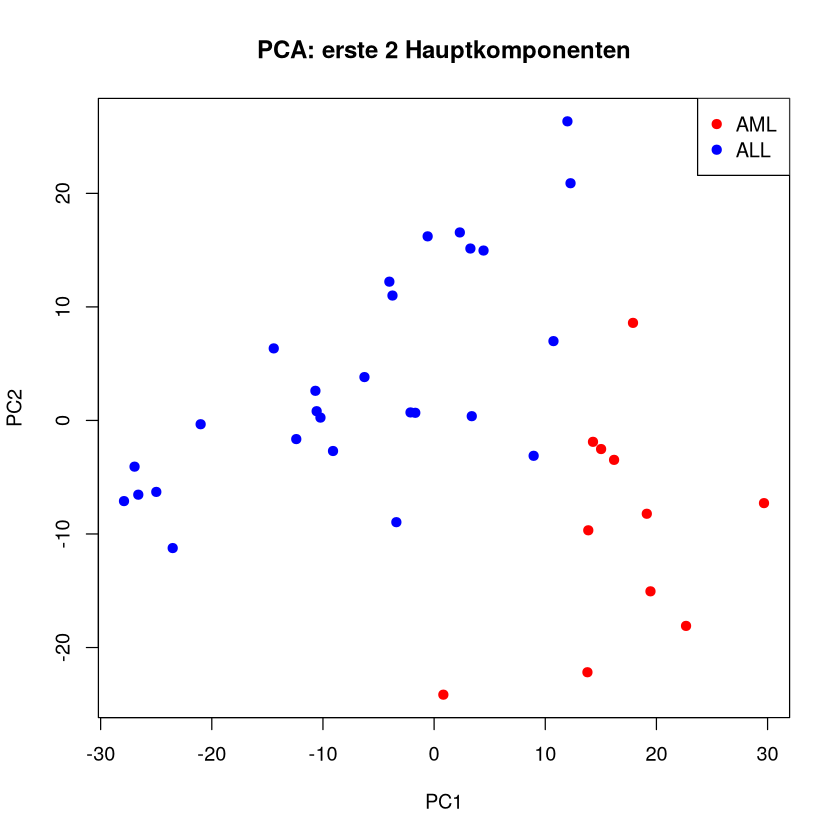

In [58]:
sample_names <- colnames(expr_cent)

labels <- ifelse(grepl("^AML", sample_names), "AML", "ALL")

colors <- ifelse(labels == "AML", "red", "blue")


plot(PC_scores[,1], PC_scores[,2],
     col = colors,
     pch = 19,
     xlab = "PC1",
     ylab = "PC2",
     main = "PCA: erste 2 Hauptkomponenten")

legend("topright",
       legend = c("AML", "ALL"),
       col = c("red", "blue"),
       pch = 19)
